In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

2023-05-03 18:11:41.914945: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-05-03 18:11:50--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0.002s  

2023-05-03 18:11:50 (1.03 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [3]:
data = pd.read_csv("moore.csv").to_numpy()

In [4]:
X = data[:,0].reshape(-1, 1) # making an N x D matrix
Y = data[:,1]

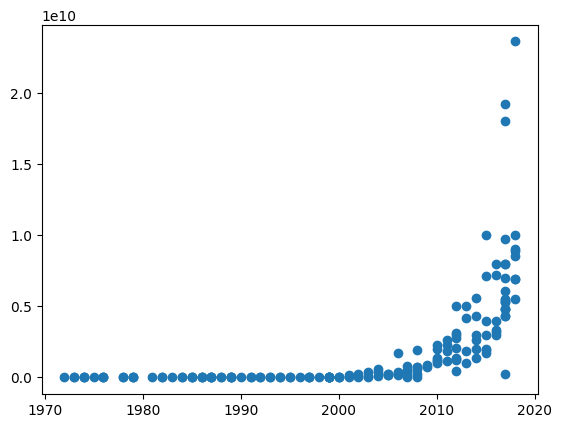

In [5]:
#plot data
plt.scatter(X, Y);

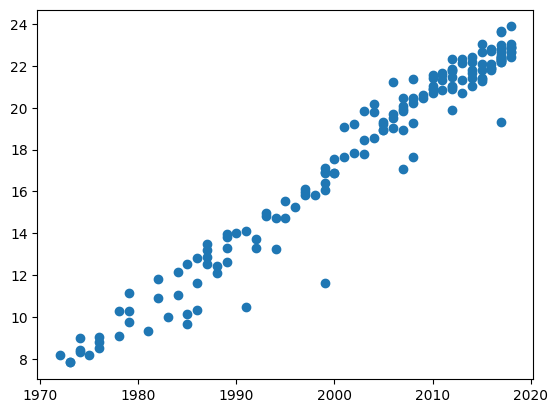

In [6]:
Y = np.log(Y) #cancel out expoential 
plt.scatter(X,Y);

In [8]:
X = X - X.mean()

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1, )),
    tf.keras.layers.Dense(1)
])

In [11]:
model.compile(
    optimizer= tf.keras.optimizers.SGD(0.001, 0.9),
    loss = 'mse' # mean squared error
    )

In [14]:
def schedule(epoch, learning_rate):
    if epoch >= 50: 
        return 0.0001
    return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [17]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler]) # have to test to know what epoch to use

Epoch 1/200
6/6 [==============================] - 1s 7ms/step - loss: 431.4524 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 9ms/step - loss: 418.6948 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 237.8373 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 267.2484 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 197.2474 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 176.1474 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 154.5744 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 12ms/step - loss: 70.5621 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 13ms/step - loss: 87.8871 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 39.9060 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 6ms/step - loss

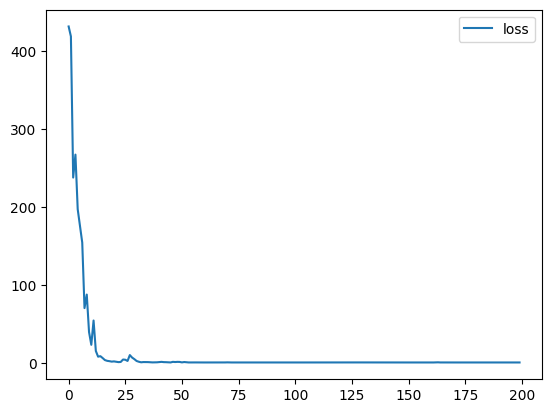

In [18]:
#plot loss
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [19]:
model.layers

In [20]:
model.layers[0].get_weights()

[array([[0.34112477]], dtype=float32), array([17.840977], dtype=float32)]

In [21]:
a = model.layers[0].get_weights()[0][0,0]

In [22]:
a

0.34112477